# EDA

In [1]:
%run -m ipy_startup
%run -m ipy_logging
%run -m ipy_plotly
%run -m ipy_seaborn
%matplotlib inline
import tensorflow as tf
import edward as ed

from mgds.data_aggregation import api
from mgds.data_aggregation import database as db
from mgds.data_aggregation import source as src
from mgds.data_aggregation import data_type as dtyp
from mgds.data_modeling.nbfn import mkl as mkl
from mgds.data_modeling.nbfn import drugs as mgds_drugs

# SEED = model_constants.SEED
# RES_DIR = '/Users/eczech/repos/mgds/python/notebook/data_modeling/kl_modeling/results/breast_cancer/cv_large'

# def rpath(filename):
#     return os.path.join(RES_DIR, filename)

2017-04-27 20:18:41,794:DEBUG:requests.packages.urllib3.connectionpool: Starting new HTTPS connection (1): api.plot.ly


In [2]:
datasets = api.get_genomic_data_availability()
d = db.cache_prep_operation(lambda: feature_data.get_feature_datasets(datasets), 'raw-features', overwrite=False)

2017-04-27 20:18:49,722:DEBUG:py_utils.io_utils: Restoring serialized object from location "/Users/eczech/data/research/mgds/prep/mgds_v1_raw-features.pkl"


In [11]:
def check_src(source):
    dt = d[(source, dtyp.GENE_EXPRESSION)].dropna(how='all', axis=0)
    print(len(dt[dt.index.get_level_values('PRIMARY_SITE:MGDS') == 'BREAST']))
    
print(src.GDSC_v2)
check_src(src.GDSC_v2)
print(src.NCI60_v2)
check_src(src.NCI60_v2)
print(src.NCIDREAM_v1)
check_src(src.NCIDREAM_v1)

gdsc_v2
50
nci60_v2


/Users/eczech/anaconda/envs/mgds/lib/python3.5/site-packages/ipykernel/ipkernel.py:196: PerformanceWarning:

indexing past lexsort depth may impact performance.



5
ncidream_v1
46


In [19]:
drugs = ['AT7519',
 'AZD7762',
 'CEP701',
 'FK866',
 'ISPINESIBMESYLATE',
 'PI103',
 'RTRAIL',
 'TRAMETINIB',
 'WZ3105']
x = d[(src.GDSC_v2, dtyp.DRUG_SENSITIVITY)][drugs].dropna(how='all', axis=0).index.get_level_values('PRIMARY_SITE:MGDS')
pd.Series(x).value_counts()

/Users/eczech/anaconda/envs/mgds/lib/python3.5/site-packages/ipykernel/kernelbase.py:390: PerformanceWarning:

indexing past lexsort depth may impact performance.



LUNG                                  173
HAEMATOPOIETIC_AND_LYMPHOID_TISSUE    172
SKIN                                   59
CENTRAL_NERVOUS_SYSTEM                 56
LARGE_INTESTINE                        53
BREAST                                 52
OVARY                                  43
UPPER_AERODIGESTIVE_TRACT              43
BONE                                   42
OESOPHAGUS                             36
KIDNEY                                 33
AUTONOMIC_GANGLIA                      33
PANCREAS                               32
STOMACH                                28
SOFT_TISSUE                            23
PLEURA                                 21
URINARY_TRACT                          20
LIVER                                  18
THYROID                                16
CERVIX                                 14
ENDOMETRIUM                            11
PROSTATE                                7
BILIARY_TRACT                           5
VULVA                             

### RPPA Data

In [2]:
X_rppa, Y_rppa, df_rppa = mkl.get_tcga_modeling_data('brca')

2017-04-19 08:37:54,678:DEBUG:py_utils.io_utils: Restoring serialized object from location "/Users/eczech/data/research/mgds/prep/tcga_v1_raw-data-matrices.pkl"
2017-04-19 08:38:22,004:INFO:mgds.data_modeling.nbfn.mkl: Imputing 530 X values of 5406245
2017-04-19 08:38:27,600:INFO:mgds.data_modeling.nbfn.mkl: Imputing 0 Y values of 68107


In [3]:
target_drugs = list(np.unique(mgds_drugs.GDSC_PAPER_DRUGS + mgds_drugs.DEFAULT_DRUGS))
X_drug, Y_drug = mkl.get_rx_modeling_data(
    drugs=target_drugs, genes=X_rppa.columns.tolist(), 
    ge_src=src.CCLE_v1, site='BREAST'
)

2017-04-19 08:38:27,618:DEBUG:py_utils.io_utils: Restoring serialized object from location "/Users/eczech/data/research/mgds/prep/mgds_v1_raw-features.pkl"
/Users/eczech/anaconda/envs/mgds/lib/python3.5/site-packages/ipykernel/ipkernel.py:196: PerformanceWarning:

indexing past lexsort depth may impact performance.

2017-04-19 08:38:44,130:INFO:mgds.data_modeling.nbfn.mkl: Removing 37 drugs of 233 due to having more than 30.0% null records


[Remove X records with null X values] Records before = 1473, Records after = 967, Records removed = 506 (%34.35)
[Remove Y records with null X values] Records before = 1473, Records after = 967, Records removed = 506 (%34.35)
[Remove X records with null Y values] Records before = 967, Records after = 639, Records removed = 328 (%33.92)
[Remove Y records with null Y values] Records before = 967, Records after = 639, Records removed = 328 (%33.92)


In [4]:
X_drug.shape

(46, 13415)

# Data Samples

In [11]:
SAMPLE_DIR = '/Users/eczech/repos/mgds/python/notebook/data_modeling/kl_modeling/samples'

In [17]:
X_drug.min().min(), X_drug.max().max(), X_drug.mean().mean()

(-18.576599999999999, 29.954000000000001, 0.026322472086729651)

In [20]:
df = X_drug.iloc[:5, :10]
df.columns.name = 'GENE'
df.to_pickle(os.path.join(SAMPLE_DIR, 'genomic_features.pkl'))
df

GENE                                   A1BG     A2M   A2ML1  A4GALT   A4GNT  \
CELL_LINE_ID:MGDS PRIMARY_SITE:MGDS                                           
AU565             BREAST            -0.7203  0.2146  1.4553 -0.6623 -0.5925   
BT20              BREAST            -0.7066 -0.5051  0.6345 -0.9157  0.5173   
BT474             BREAST            -1.2665 -0.4155 -0.3491 -0.2819 -0.3083   
BT483             BREAST             0.6909 -0.2528 -0.1435  0.7511 -0.9741   
BT549             BREAST             1.3433 -0.3780 -0.1978  0.1811 -0.4132   

GENE                                   AAAS    AACS   AADAC  AADACL2   AADAT  
CELL_LINE_ID:MGDS PRIMARY_SITE:MGDS                                           
AU565             BREAST             1.8444  1.6000 -0.0267  -0.5664 -0.6264  
BT20              BREAST            -0.0836  0.8155 -0.4130   0.6665 -1.7076  
BT474             BREAST            -0.5347  0.1965 -0.3221  -0.6366 -0.1124  
BT483             BREAST            -0.9885  0.6537 -0.2252  -0.0677  0.2028  
BT549             BREAST             0.5231 -2.0494 -0.5520   0.4526 -1.0863

In [18]:
Y_drug.min().min(), Y_drug.max().max(), Y_drug.mean().mean()

(-7.9403889000000003, 12.8022799, 2.5663302502859495)

In [19]:
(Y_drug <= -1).sum().sum() / (Y_drug.shape[0] * Y_drug.shape[1])

0.094276841171251111

In [21]:
df = Y_drug.iloc[:, :6].dropna().head(5)
df.columns.name = 'DRUG'
df.to_pickle(os.path.join(SAMPLE_DIR, 'drug_sensitivity.pkl'))
df

DRUG                                    17AAG  5FLUOROURACIL  5Z7OXOZEAENOL  \
CELL_LINE_ID:MGDS PRIMARY_SITE:MGDS                                           
BT20              BREAST            -0.867087       5.330484       1.131463   
BT474             BREAST            -3.320525       3.677684       0.913706   
BT483             BREAST             0.356745       2.868350       1.831044   
CAL120            BREAST            -0.506500       3.580095       0.055861   
CAL51             BREAST            -3.708077       3.747422      -0.262070   

DRUG                                   681640     AC220  AFATINIB  
CELL_LINE_ID:MGDS PRIMARY_SITE:MGDS                                
BT20              BREAST             2.167905  2.516425  3.002986  
BT474             BREAST             3.432221  2.277451  0.222930  
BT483             BREAST             3.291616  3.507311  6.779484  
CAL120            BREAST             1.559796  2.801162  3.452226  
CAL51             BREAST             1.394004  1.760656  3.113380

In [22]:
X_rppa.min().min(), X_rppa.max().max(), X_rppa.mean().mean()

(-11.84767347810517, 15.582078360231401, 2.3638280628056917e-19)

In [23]:
Y_rppa.min().min(), Y_rppa.max().max(), Y_rppa.mean().mean()

(-6.8494999999999999, 11.357900000000001, -0.00029622358935203806)

In [27]:
df = Y_rppa.iloc[:, :6].dropna().head(5)
df.columns.name = 'PROTEIN'
df.index.name = 'SAMPLE_ID'
df.to_pickle(os.path.join(SAMPLE_DIR, 'rppa.pkl'))
df

PROTEIN            ABL1   ACACA  ACVRL1    ADAR    AKT1    AKT2
SAMPLE_ID                                                      
TCGA-A1-A0SH-01  0.1414  1.7752 -0.2407 -0.7190  0.7654  0.7654
TCGA-A1-A0SJ-01 -1.0458  0.3505 -0.1300 -0.5828  0.0138  0.0138
TCGA-A1-A0SK-01 -0.3807 -0.9959 -0.6685  0.8784 -0.3473 -0.3473
TCGA-A1-A0SO-01 -0.2390  0.6525 -0.7010  0.9611  1.0870  1.0870
TCGA-A2-A04N-01  0.6021 -1.1306  0.8882 -0.4393 -0.0384 -0.0384

## PCA

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
pca = PCA(n_components=99)
X_scale = scaler.fit_transform(X_drug.values)
pca = pca.fit(X_scale)
X_pca = pca.transform(X_scale)

In [21]:
X_pca.shape, X_scale.shape

((46, 46), (46, 13415))

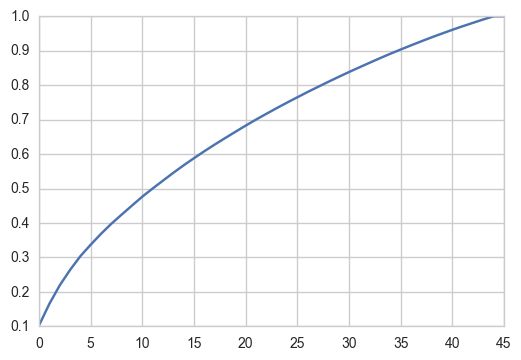

In [22]:
pd.Series(pca.explained_variance_ratio_).cumsum().plot()

## Correlations

## Gene Expression

### GDSC Correlations

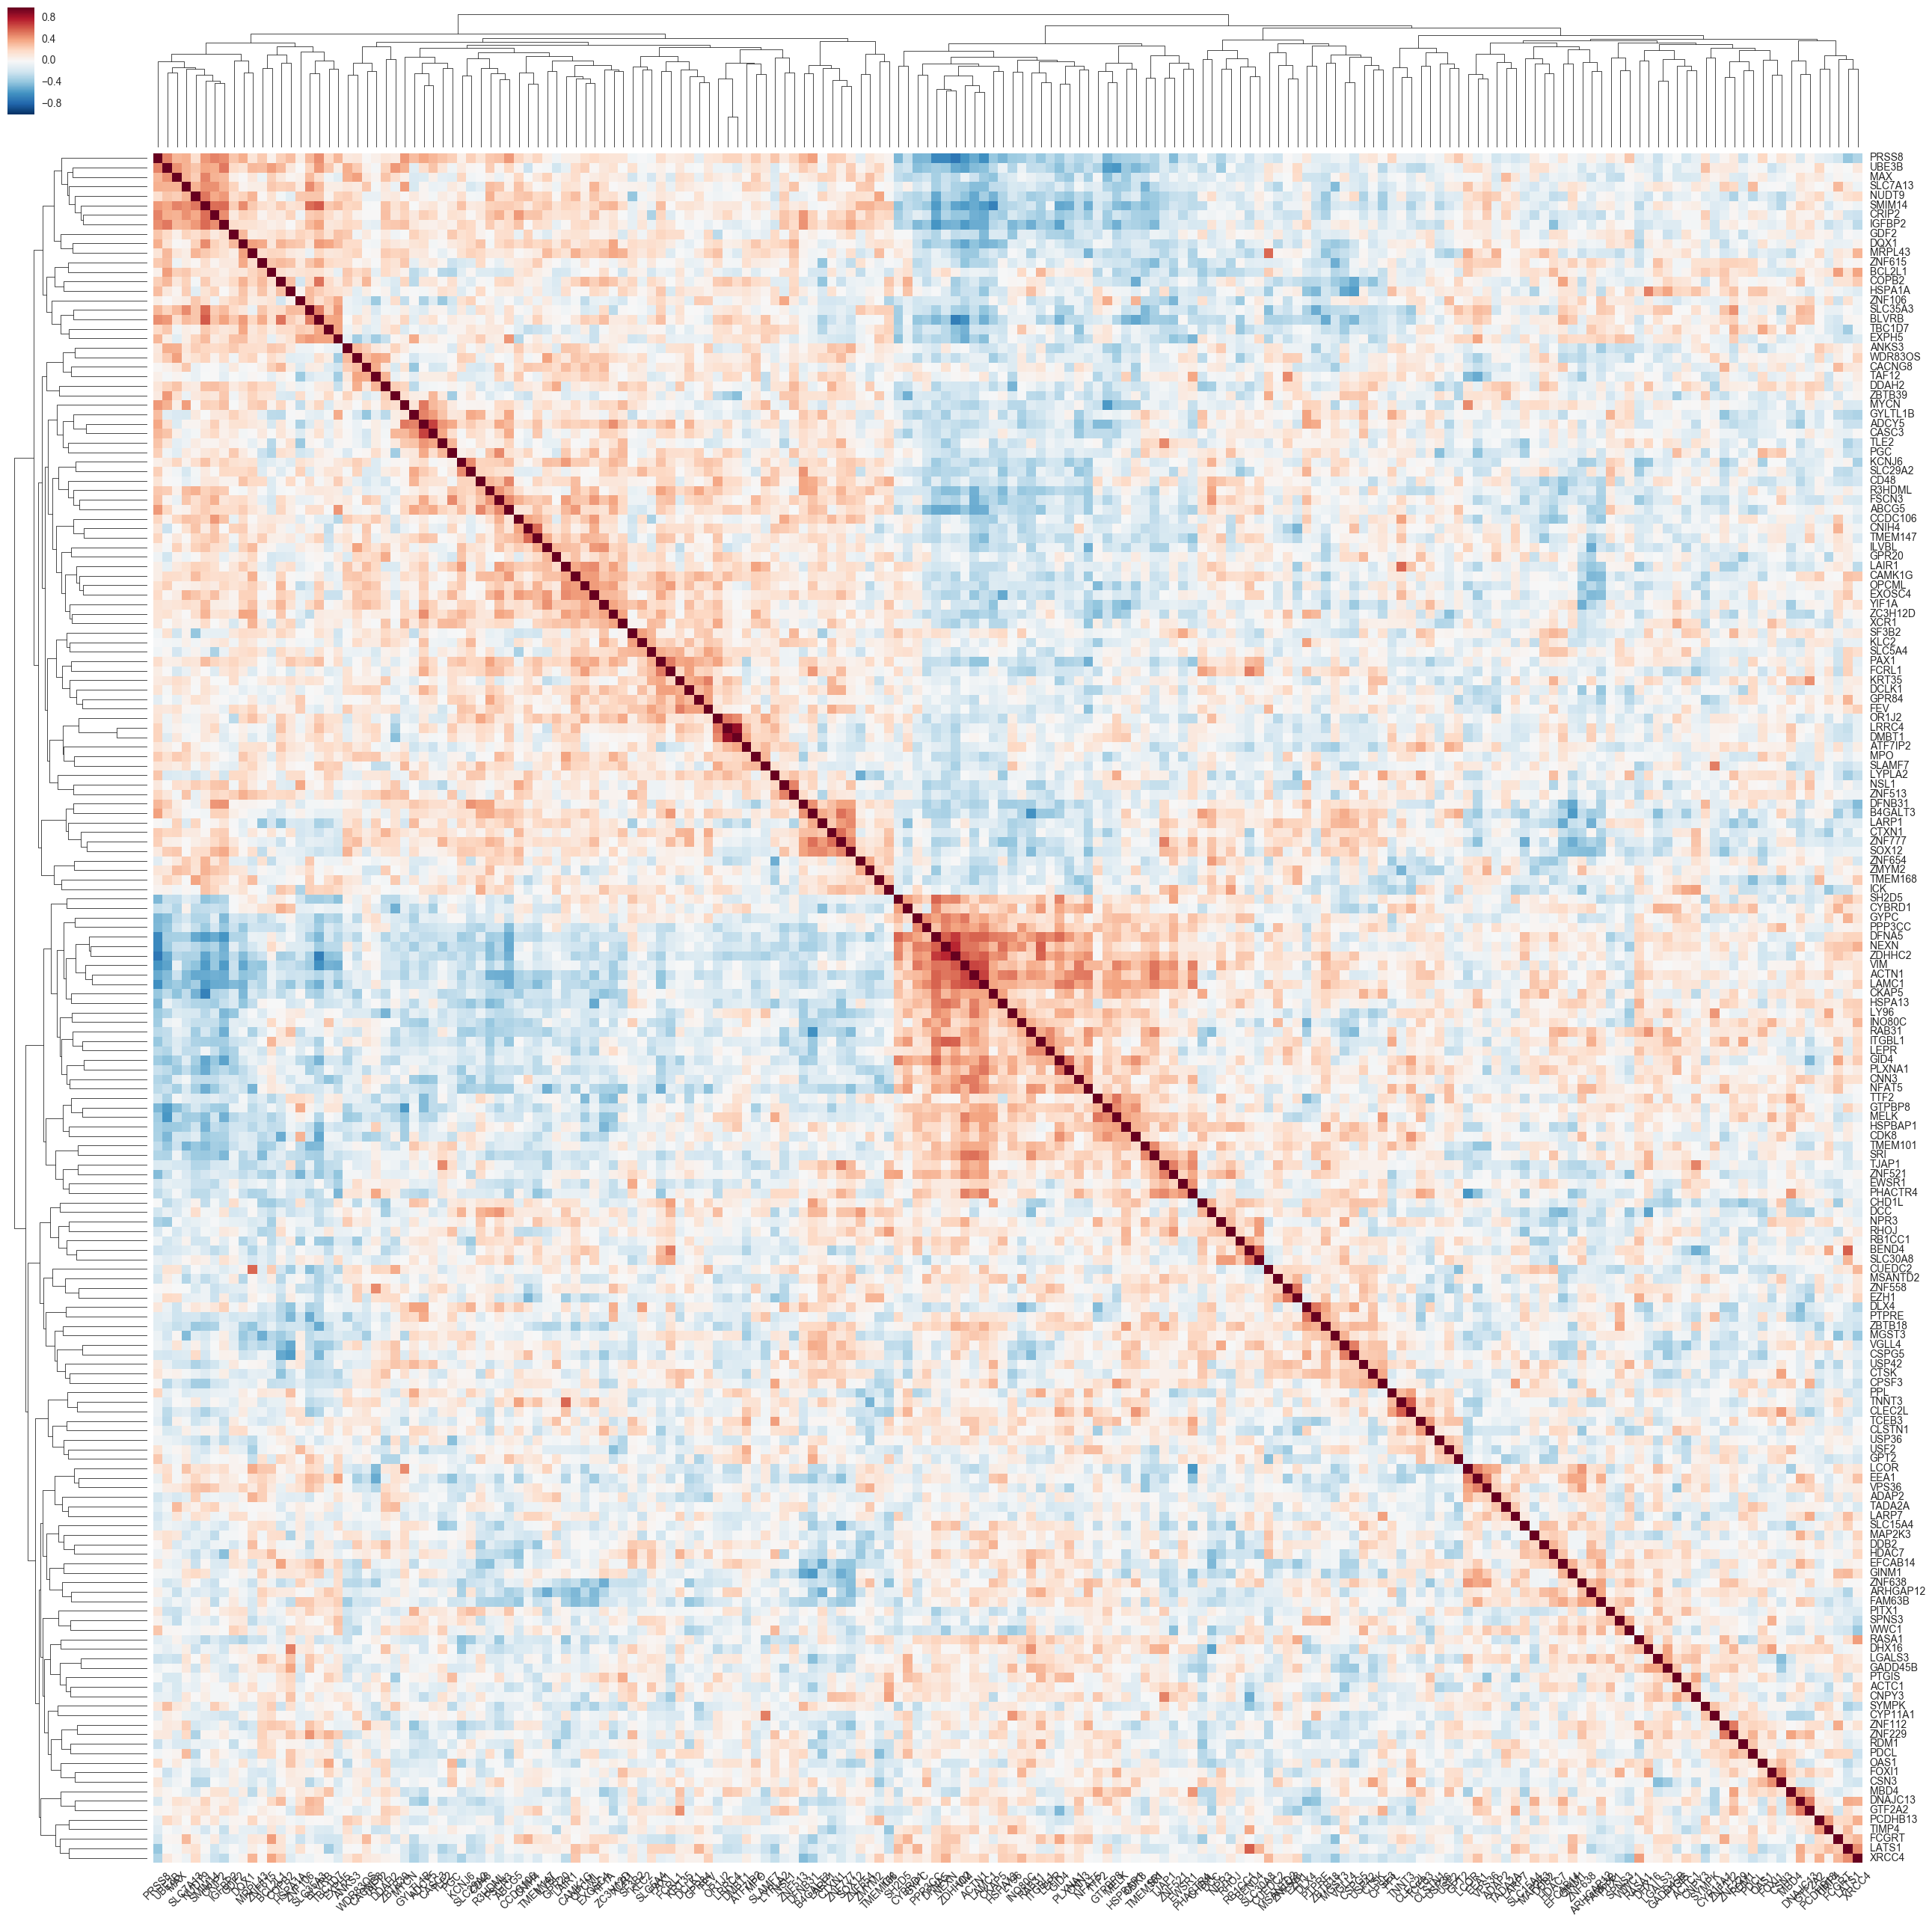

In [23]:
genes = np.random.choice(X_drug.columns.values, replace=False, size=180)
g = sns.clustermap(X_drug[genes].corr(), figsize=(32, 32)) 
for i, ax in enumerate(g.fig.axes):   
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

In [25]:
### CCLE Correlations

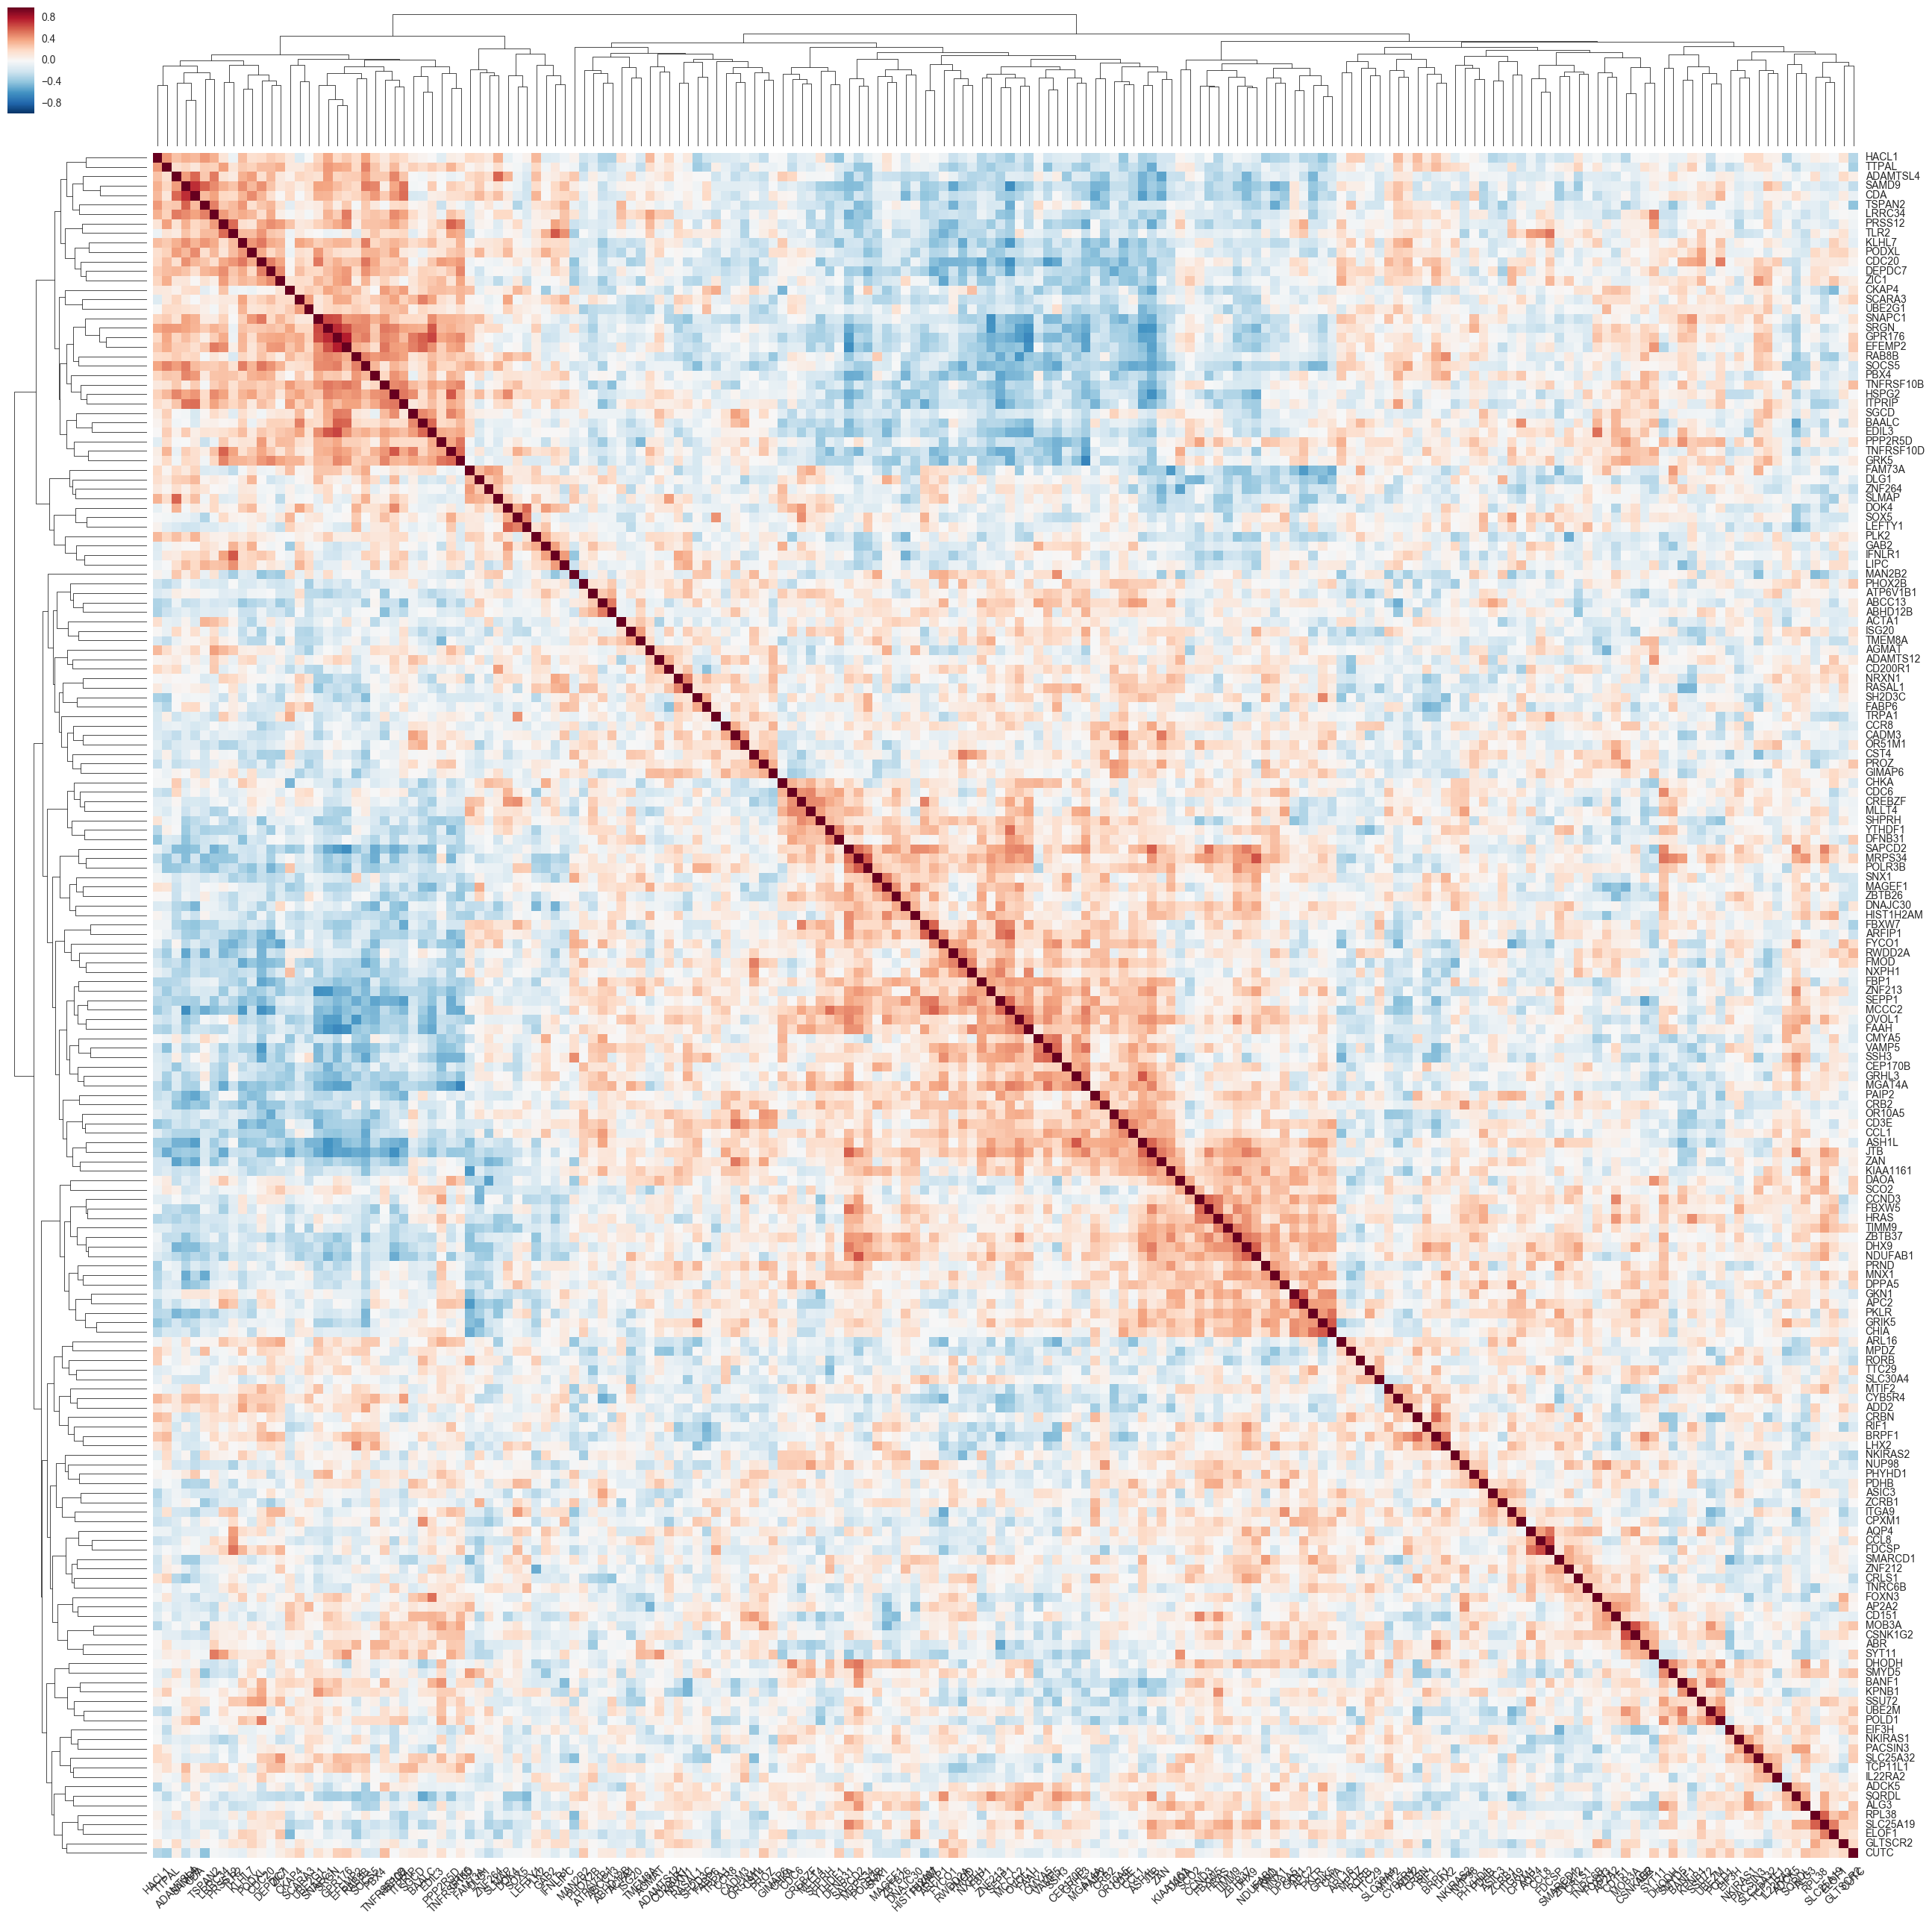

In [20]:
genes = np.random.choice(X_drug.columns.values, replace=False, size=180)
g = sns.clustermap(X_drug[genes].corr(), figsize=(32, 32)) 
for i, ax in enumerate(g.fig.axes):   
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

### RPPA Correlations

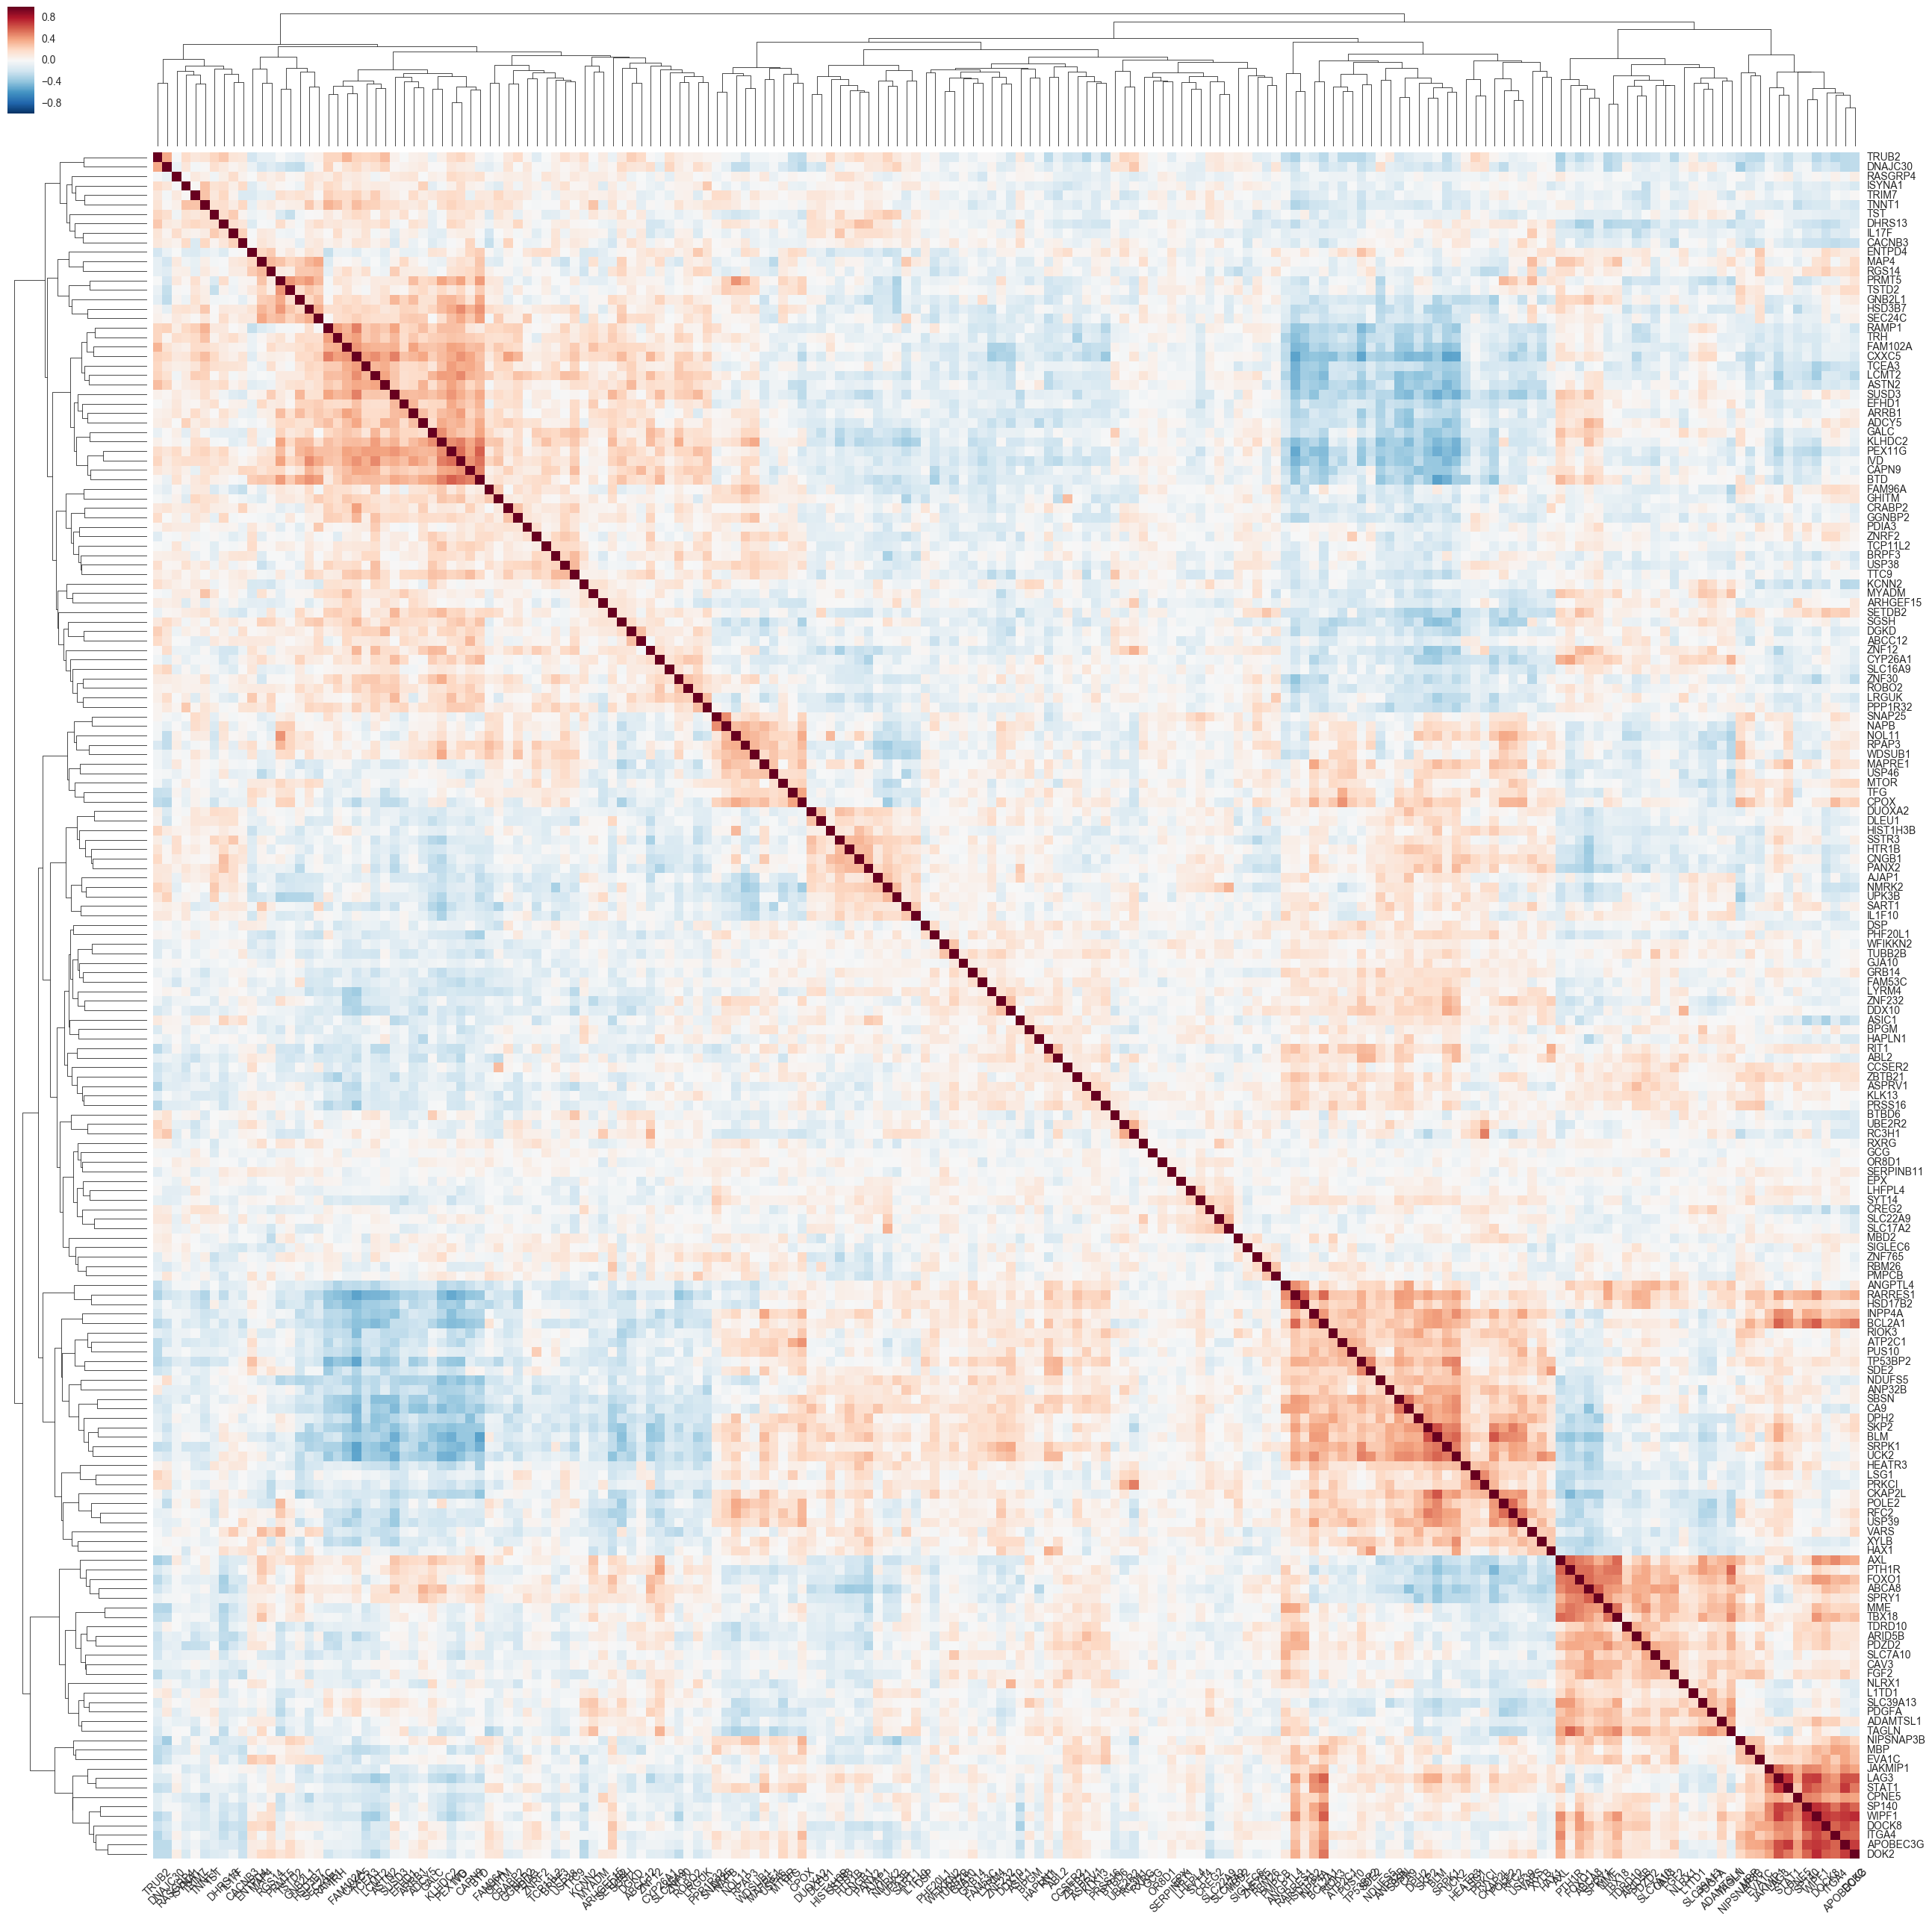

In [21]:
genes = np.random.choice(X_rppa.columns.values, replace=False, size=180)
g = sns.clustermap(X_rppa[genes].corr(), figsize=(32, 32)) 
for i, ax in enumerate(g.fig.axes):   
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

## Drugs

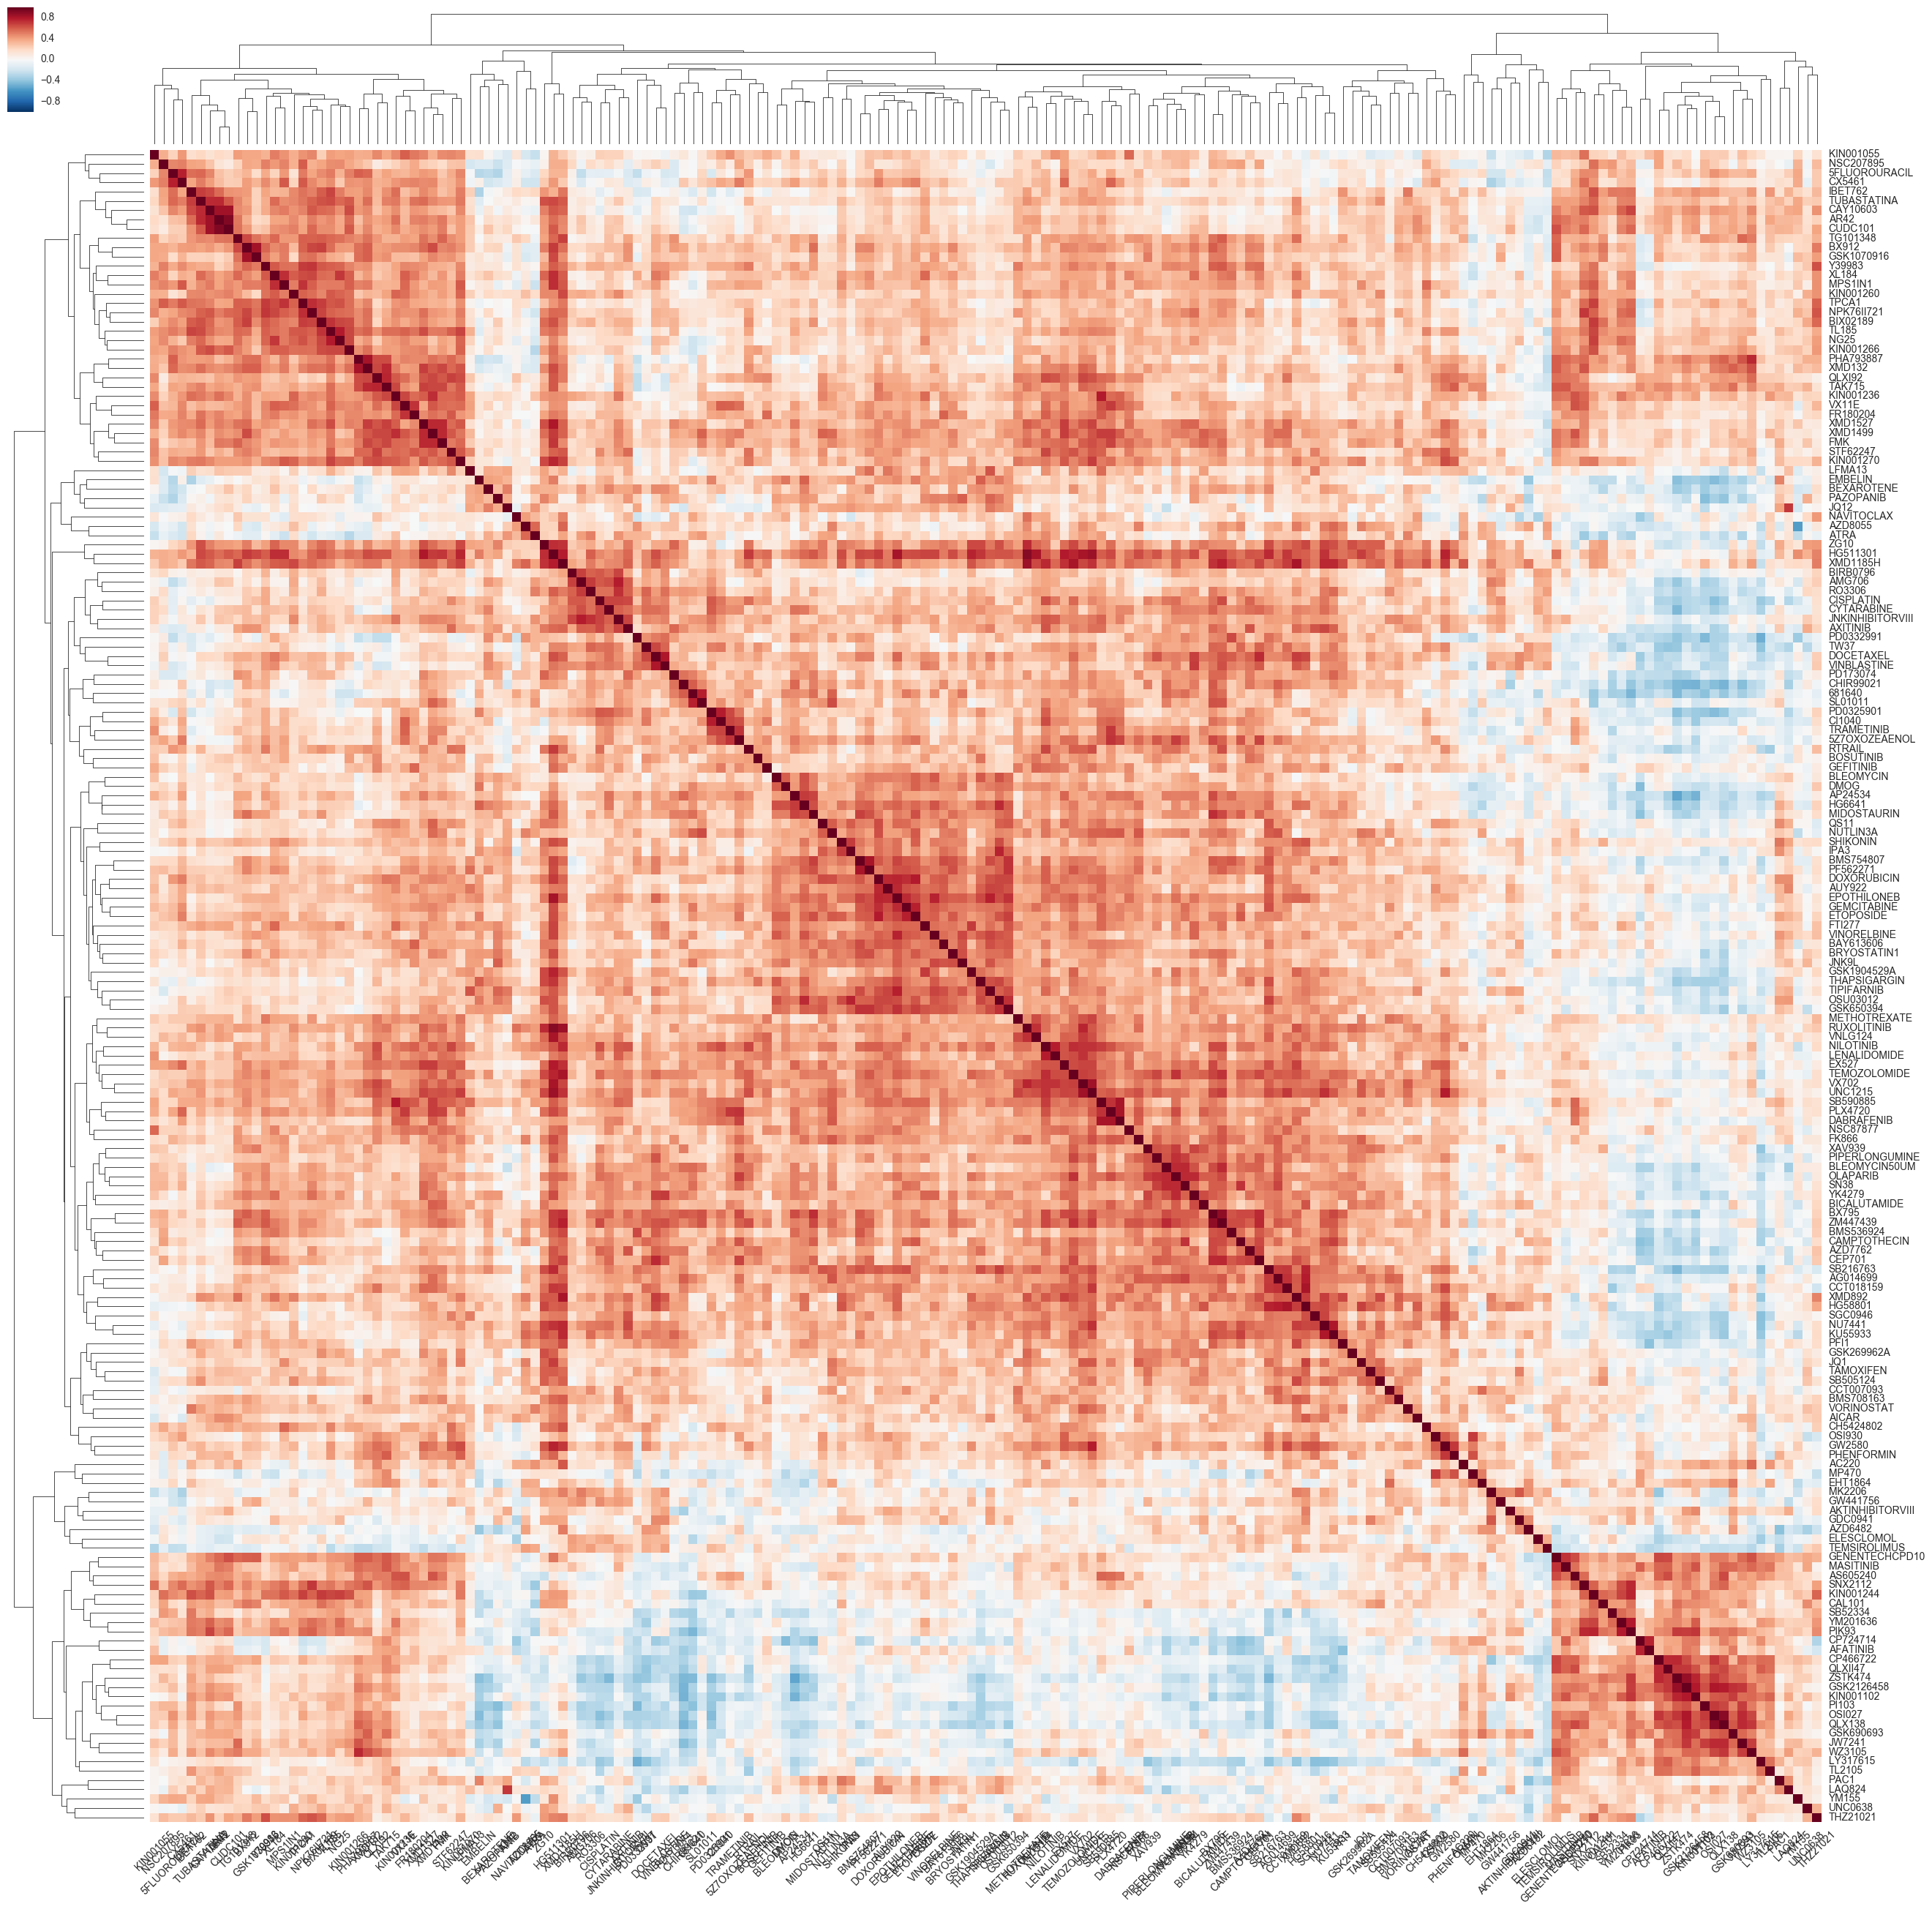

In [27]:
drugs = np.random.choice(Y_drug.columns.values, replace=False, size=180)
g = sns.clustermap(Y_drug[drugs].corr(), figsize=(32, 32)) 
for i, ax in enumerate(g.fig.axes):   
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)